# Main class for running the molecule environment

In [1]:
import gym
from gym import wrappers, logger
from MoleculeAgent import MoleculeAgent
from rdkit import Chem
from rdkit.Chem import AllChem, Draw
import matplotlib.pyplot as plt
# TODO: Render as a main function too
# Render toggled in the main class 
# find the correct time delay
# 
# Add pop in modifications

1: Set Environment initial molecule and optimization goal. 
2: Use a Random Goal from dataset and initial moecule. 
1
Enter a molecule to act as an optimisation Goal. 
O=C(C)Oc1ccccc1C(=O)O
Enter an atom or molecule to act as the start state of the environment: 
C
Set the desired build similarity of your molecule:
 %67
Environment initialiased.
EPISODE: 1
Env original state:  None

ACTION:  2

OBSERVED STATE: 0.565 
REWARD: 0 
DONE: False 
INFO:  ['=O']


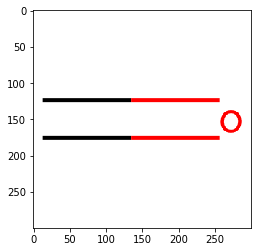


ACTION:  0

OBSERVED STATE: -1 
REWARD: -10 
DONE: False 
INFO:  ['=O', 'O', 'Reverted', 'Reverted', 'Reverted']
Cannot render this molecule

ACTION:  1

OBSERVED STATE: 0.565 
REWARD: 0 
DONE: False 
INFO:  ['=O', 'O', 'Reverted', 'Reverted', 'Reverted', 'O']


RDKit ERROR: [16:04:55] Explicit valence for atom # 1 O, 3, is greater than permitted
RDKit ERROR: [16:04:55] Explicit valence for atom # 1 O, 3, is greater than permitted
RDKit ERROR: [16:04:55] Explicit valence for atom # 1 O, 3, is greater than permitted


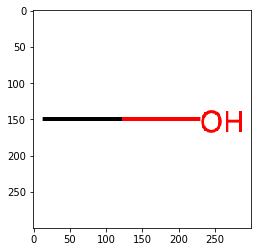


ACTION:  5

OBSERVED STATE: 0.565 
REWARD: 0 
DONE: False 
INFO:  ['=O', 'O', 'Reverted', 'Reverted', 'Reverted', 'O', 'ring']


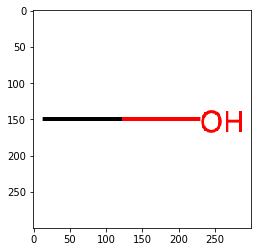


ACTION:  3

OBSERVED STATE: 0.8451 
REWARD: 0 
DONE: False 
INFO:  ['=O', 'O', 'Reverted', 'Reverted', 'Reverted', 'O', 'ring', 'C']


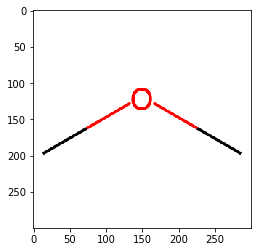


ACTION:  5

OBSERVED STATE: 0.8451 
REWARD: 0 
DONE: False 
INFO:  ['=O', 'O', 'Reverted', 'Reverted', 'Reverted', 'O', 'ring', 'C', 'ring']


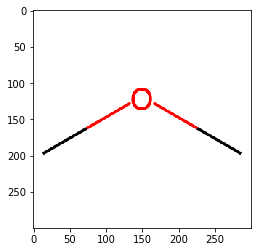


ACTION:  2

OBSERVED STATE: 1.9608 
REWARD: 0 
DONE: False 
INFO:  ['=O', 'O', 'Reverted', 'Reverted', 'Reverted', 'O', 'ring', 'C', 'ring', 'C']


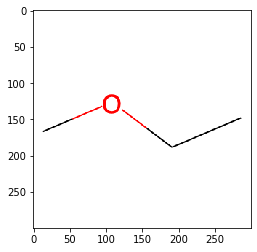


ACTION:  5

OBSERVED STATE: 1.9608 
REWARD: 0 
DONE: False 
INFO:  ['=O', 'O', 'Reverted', 'Reverted', 'Reverted', 'O', 'ring', 'C', 'ring', 'C', 'ring']


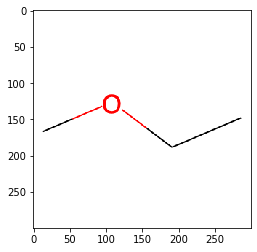


ACTION:  5

OBSERVED STATE: 1.9608 
REWARD: 0 
DONE: False 
INFO:  ['=O', 'O', 'Reverted', 'Reverted', 'Reverted', 'O', 'ring', 'C', 'ring', 'C', 'ring', 'ring']


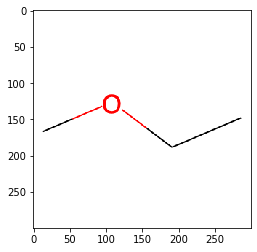


ACTION:  2

OBSERVED STATE: 2.7701 
REWARD: 0 
DONE: False 
INFO:  ['=O', 'O', 'Reverted', 'Reverted', 'Reverted', 'O', 'ring', 'C', 'ring', 'C', 'ring', 'ring', '=C']


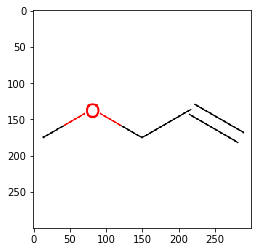


ACTION:  2

OBSERVED STATE: 2.9891 
REWARD: 0 
DONE: False 
INFO:  ['=O', 'O', 'Reverted', 'Reverted', 'Reverted', 'O', 'ring', 'C', 'ring', 'C', 'ring', 'ring', '=C', 'O']


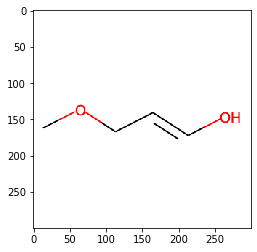


ACTION:  3

OBSERVED STATE: 2.9412 
REWARD: 0 
DONE: False 
INFO:  ['=O', 'O', 'Reverted', 'Reverted', 'Reverted', 'O', 'ring', 'C', 'ring', 'C', 'ring', 'ring', '=C', 'O', 'C']


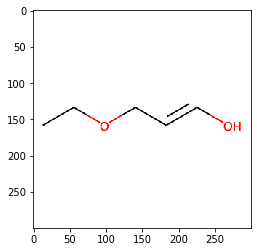


ACTION:  5

OBSERVED STATE: 2.9412 
REWARD: 0 
DONE: False 
INFO:  ['=O', 'O', 'Reverted', 'Reverted', 'Reverted', 'O', 'ring', 'C', 'ring', 'C', 'ring', 'ring', '=C', 'O', 'C', 'ring']


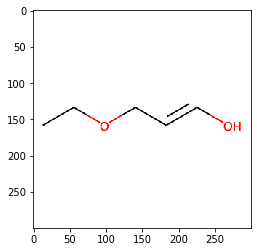


ACTION:  2

OBSERVED STATE: 3.4211 
REWARD: 0 
DONE: False 
INFO:  ['=O', 'O', 'Reverted', 'Reverted', 'Reverted', 'O', 'ring', 'C', 'ring', 'C', 'ring', 'ring', '=C', 'O', 'C', 'ring', 'C']


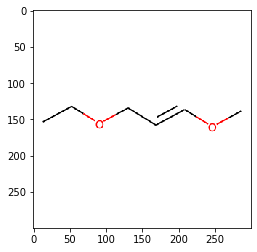


ACTION:  0

OBSERVED STATE: 3.8462 
REWARD: 0 
DONE: False 
INFO:  ['=O', 'O', 'Reverted', 'Reverted', 'Reverted', 'O', 'ring', 'C', 'ring', 'C', 'ring', 'ring', '=C', 'O', 'C', 'ring', 'C', 'O']


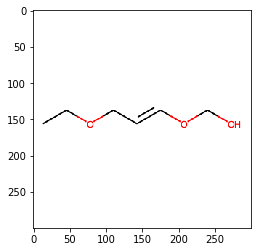


ACTION:  3

OBSERVED STATE: 4.25 
REWARD: 0 
DONE: False 
INFO:  ['=O', 'O', 'Reverted', 'Reverted', 'Reverted', 'O', 'ring', 'C', 'ring', 'C', 'ring', 'ring', '=C', 'O', 'C', 'ring', 'C', 'O', 'C']


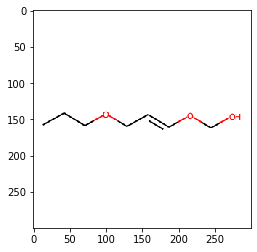


ACTION:  1

OBSERVED STATE: 4.1463 
REWARD: 0 
DONE: False 
INFO:  ['=O', 'O', 'Reverted', 'Reverted', 'Reverted', 'O', 'ring', 'C', 'ring', 'C', 'ring', 'ring', '=C', 'O', 'C', 'ring', 'C', 'O', 'C', 'C']


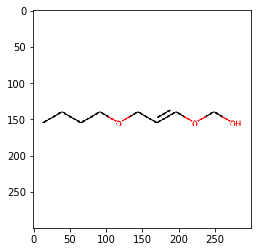


ACTION:  1

OBSERVED STATE: 4.6005 
REWARD: 0 
DONE: False 
INFO:  ['=O', 'O', 'Reverted', 'Reverted', 'Reverted', 'O', 'ring', 'C', 'ring', 'C', 'ring', 'ring', '=C', 'O', 'C', 'ring', 'C', 'O', 'C', 'C', 'O']


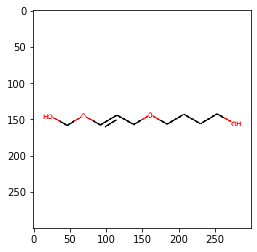


ACTION:  1

OBSERVED STATE: 4.5783 
REWARD: 0 
DONE: False 
INFO:  ['=O', 'O', 'Reverted', 'Reverted', 'Reverted', 'O', 'ring', 'C', 'ring', 'C', 'ring', 'ring', '=C', 'O', 'C', 'ring', 'C', 'O', 'C', 'C', 'O', 'C']


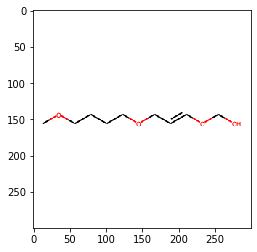


ACTION:  5

OBSERVED STATE: 4.5783 
REWARD: 0 
DONE: False 
INFO:  ['=O', 'O', 'Reverted', 'Reverted', 'Reverted', 'O', 'ring', 'C', 'ring', 'C', 'ring', 'ring', '=C', 'O', 'C', 'ring', 'C', 'O', 'C', 'C', 'O', 'C', 'ring']


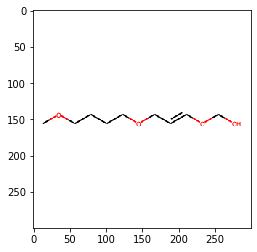

EPISODE: 2
Env original state:  None

ACTION:  1

OBSERVED STATE: 0.565 
REWARD: 0 
DONE: False 
INFO:  ['C']


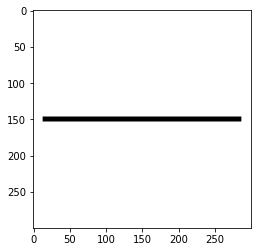


ACTION:  5

OBSERVED STATE: 0.565 
REWARD: 0 
DONE: False 
INFO:  ['C', 'ring']


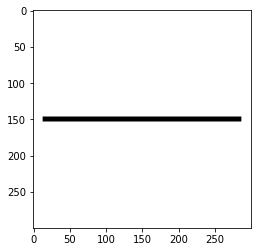


ACTION:  4

OBSERVED STATE: 0.565 
REWARD: 0 
DONE: False 
INFO:  ['C', 'ring', 'bracketed atom']


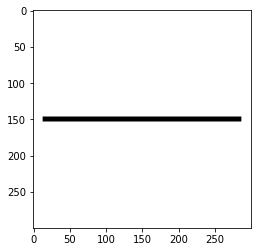


ACTION:  0

OBSERVED STATE: 0.5618 
REWARD: 0 
DONE: False 
INFO:  ['C', 'ring', 'bracketed atom', 'C']


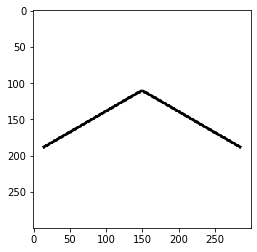


ACTION:  0

OBSERVED STATE: 0.5587 
REWARD: 0 
DONE: False 
INFO:  ['C', 'ring', 'bracketed atom', 'C', 'C']


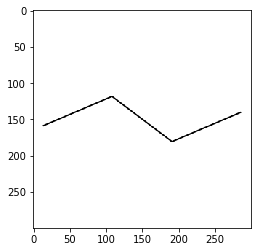


ACTION:  4

OBSERVED STATE: 0.5587 
REWARD: 0 
DONE: False 
INFO:  ['C', 'ring', 'bracketed atom', 'C', 'C', 'bracketed atom']


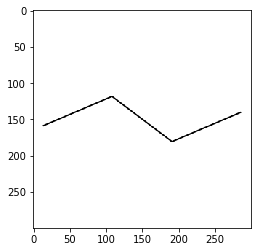


ACTION:  3

OBSERVED STATE: 1.6575 
REWARD: 0 
DONE: False 
INFO:  ['C', 'ring', 'bracketed atom', 'C', 'C', 'bracketed atom', 'O=']


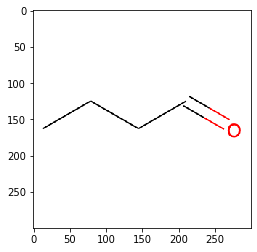


ACTION:  0

OBSERVED STATE: 2.7174 
REWARD: 0 
DONE: False 
INFO:  ['C', 'ring', 'bracketed atom', 'C', 'C', 'bracketed atom', 'O=', 'O']


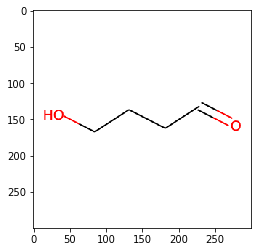


ACTION:  5

OBSERVED STATE: 2.7174 
REWARD: 0 
DONE: False 
INFO:  ['C', 'ring', 'bracketed atom', 'C', 'C', 'bracketed atom', 'O=', 'O', 'ring']


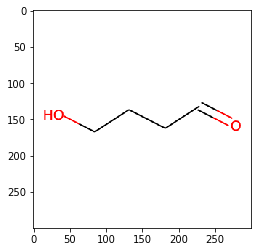


ACTION:  4

OBSERVED STATE: 2.7174 
REWARD: 0 
DONE: False 
INFO:  ['C', 'ring', 'bracketed atom', 'C', 'C', 'bracketed atom', 'O=', 'O', 'ring', 'bracketed atom']


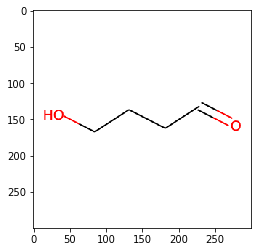


ACTION:  3

OBSERVED STATE: -1 
REWARD: -10 
DONE: False 
INFO:  ['C', 'ring', 'bracketed atom', 'C', 'C', 'bracketed atom', 'O=', 'O', 'ring', 'bracketed atom', 'C', 'Reverted', 'Reverted', 'Reverted']
Cannot render this molecule

ACTION:  2

OBSERVED STATE: -1 
REWARD: -10 
DONE: False 
INFO:  ['C', 'ring', 'bracketed atom', 'C', 'C', 'bracketed atom', 'O=', 'O', 'ring', 'bracketed atom', 'C', 'Reverted', 'Reverted', 'Reverted', 'C', 'Reverted', 'Reverted', 'Reverted']
Cannot render this molecule

ACTION:  5

OBSERVED STATE: -1 
REWARD: -10 
DONE: False 
INFO:  ['C', 'ring', 'bracketed atom', 'C', 'C', 'bracketed atom', 'O=', 'O', 'ring', 'bracketed atom', 'C', 'Reverted', 'Reverted', 'Reverted', 'C', 'Reverted', 'Reverted', 'Reverted', 'ring', 'Reverted', 'Reverted']
Cannot render this molecule

ACTION:  0

OBSERVED STATE: -1 
REWARD: -10 
DONE: False 
INFO:  ['C', 'ring', 'bracketed atom', 'C', 'C', 'bracketed atom', 'O=', 'O', 'ring', 'bracketed atom', 'C', 'Reverted', 'Reverted'

RDKit ERROR: [16:05:18] Explicit valence for atom # 1 O, 3, is greater than permitted
RDKit ERROR: [16:05:18] Explicit valence for atom # 1 O, 3, is greater than permitted
RDKit ERROR: [16:05:18] Explicit valence for atom # 1 O, 3, is greater than permitted
RDKit ERROR: [16:05:18] Explicit valence for atom # 1 O, 3, is greater than permitted
RDKit ERROR: [16:05:18] Explicit valence for atom # 1 O, 3, is greater than permitted
RDKit ERROR: [16:05:18] Explicit valence for atom # 1 O, 3, is greater than permitted
RDKit ERROR: [16:05:18] Explicit valence for atom # 1 O, 3, is greater than permitted
RDKit ERROR: [16:05:18] Explicit valence for atom # 1 O, 3, is greater than permitted
RDKit ERROR: [16:05:18] Explicit valence for atom # 1 O, 3, is greater than permitted
RDKit ERROR: [16:05:18] Explicit valence for atom # 1 O, 3, is greater than permitted
RDKit ERROR: [16:05:18] Explicit valence for atom # 1 O, 3, is greater than permitted
RDKit ERROR: [16:05:18] Explicit valence for atom # 1 

In [5]:
def validate(mol):
        try:
            molecule = Chem.MolFromSmiles(mol)
            smiles = Chem.MolToSmiles(molecule, isomericSmiles=True)
        except:
            print("Entered input is chemically invalid")
            return False
        else:
            
            return True


def main():   
    
    menu = input("1: Set Environment initial molecule and optimization goal. \n2: Use a Random Goal from dataset and initial moecule. \n")
    if menu == "2":  # Random goal
        mol = 1
        goal = 1
    elif menu == "1": # Cumstom inputs
        # Get valid input goal and start state from user
        validgoal = False
        validmol = False
        while validgoal == False: 
            goal = input("Enter a molecule to act as an optimisation Goal. \n")
            validgoal = validate(goal)  

        while validmol == False:
            mol = input("Enter an atom or molecule to act as the start state of the environment: \n")
            validmol = validate(mol)
            
    accuracy = float(input("Set the desired build similarity of your molecule:\n " + "%")) 
    
    env = gym.make("gym_molecule:molecule-v0", mol = mol, goal= goal, similarity = accuracy) # Instantiate environment
    print("Environment initialiased.")
     
    agent = MoleculeAgent(env.action_space) # Create a new Molecule Agent object.
    
    
    episode_count = 2
    reward = 0
    done = False

    #The 'RL algorithm' learns for 2 episodes of undefined length.
    for i in range(1, episode_count +1 ):
        print("EPISODE:", i)
        
        #The env resets.
        ob = env.reset()
        print("Env original state: ", ob)
        
        #While what is True? Maybe While done is False?
        for x in range(20):
            
            #The agent chooses its action based on the tuple from the current env state.
            action = agent.act(ob, reward, done)
            print()
            print("ACTION: ", action) 
            
            #The new tuple is returned because the env has considered the agent's action.
            ob, reward, done, _ = env.step(action)
            
            
            print("\nOBSERVED STATE:", ob, "\nREWARD:", reward, "\nDONE:", done,"\nINFO: ", _)
            
            #The env renders. 
            SMILES = env.render()

            if done == True:
                print("Molecule Optimized.")
                break

            
        
            #If the env reaches a terminating state, the current iteration ends and the next 
            #episode begins. 

        
    env.close()
    
    
if __name__ == '__main__':
    main()

# Aspirin: O=C(C)Oc1ccccc1C(=O)O
# Start with: Oc1ccccc1C